# To predict diabetes using PIMA diabetes data

In [85]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read data from csv
data = pd.read_csv('pima-data.csv')

In [3]:
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
data.shape 

(768, 10)

In [5]:
# check null values
data.isnull().sum() 

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [7]:
import seaborn as sb

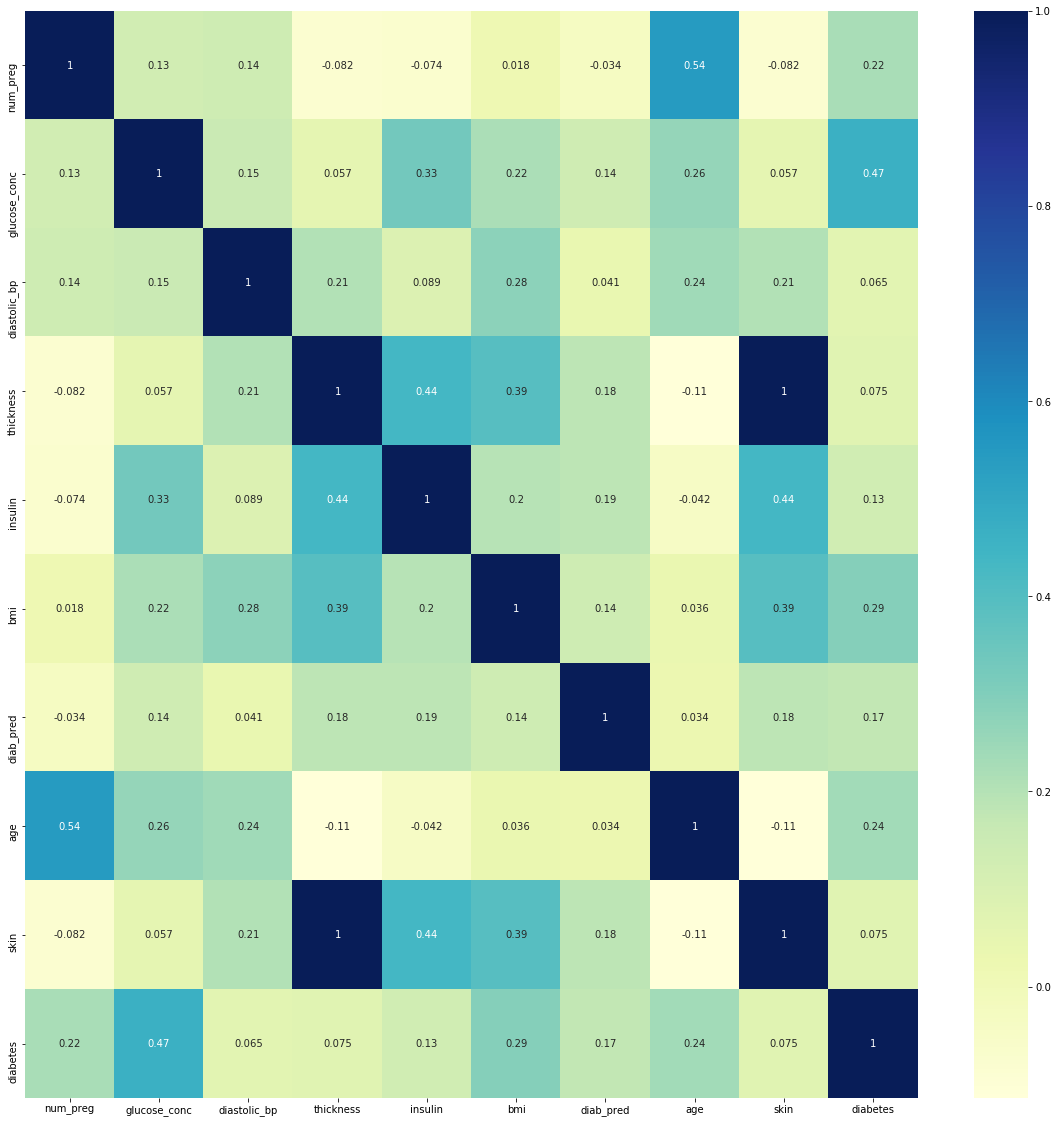

In [12]:
import seaborn as sb
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="YlGnBu")

In [16]:

cormat  # cormat =  data.corr() 

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [17]:
# map numerical values with boolean values
diabetes_map = {True : 1, False : 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)
data['diabetes']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [21]:
# check data is balanced or not
true_count = len(data.loc[data['diabetes'] == 1])
false_count = len(data.loc[data['diabetes'] == 0])
true_count, false_count

(268, 500)

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
# X is independent and y is dependent which we have to predict
X, y = [data.iloc[:, :-1], data.iloc[:, -1]]
X, y

(     num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
 0           6           148            72         35        0  33.6   
 1           1            85            66         29        0  26.6   
 2           8           183            64          0        0  23.3   
 3           1            89            66         23       94  28.1   
 4           0           137            40         35      168  43.1   
 ..        ...           ...           ...        ...      ...   ...   
 763        10           101            76         48      180  32.9   
 764         2           122            70         27        0  36.8   
 765         5           121            72         23      112  26.2   
 766         1           126            60          0        0  30.1   
 767         1            93            70         31        0  30.4   
 
      diab_pred  age    skin  
 0        0.627   50  1.3790  
 1        0.351   31  1.1426  
 2        0.672   32  0.0000  
 3        

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [30]:
# check how many zeros in column
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [36]:
# fill values in 0 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0,strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# for hyperparameter tuning
random_forest_classifier = RandomForestClassifier(random_state=10)

In [42]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [66]:
predict_train_data = random_forest_classifier.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.753


In [67]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [50]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier = xgboost.XGBClassifier()

In [68]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, cv=10, verbose=3, scoring='roc_auc')

In [69]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [70]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, score=0.770, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, score=0.847, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, score=0.816, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, score=0.700, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, score=0.806, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, score=0.854, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, score=0.867, total=   0.1s
[CV] min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5 
[CV]  min_child_weight=5, max_depth=8, learning_rate=0.05, gamma=0.4, colsample_bytree=0.5, score=0.907, total=   0.2s
[CV] min_child_weight=5, max_depth=8, lea

[CV]  min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, score=0.693, total=   0.2s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7 
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, score=0.773, total=   0.2s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7 
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, score=0.813, total=   0.2s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7 
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, score=0.850, total=   0.1s
[CV] min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7 
[CV]  min_child_weight=7, max_depth=8, learning_rate=0.2, gamma=0.1, colsample_bytree=0.7, score=0.861, total=   0.2s
[CV] min_child_weight=7, max_depth=8, learning_rat

[CV]  min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.740, total=   0.2s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.804, total=   0.1s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.842, total=   0.1s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.879, total=   0.1s
[CV] min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7 
[CV]  min_child_weight=3, max_depth=12, learning_rate=0.25, gamma=0.0, colsample_bytree=0.7, score=0.771, total=   0.2s
[CV] min_child_weight=3, max_dep

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   13.1s finished


In [72]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [73]:
classifier = xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [74]:
classifier.fit(X_train ,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [75]:
from sklearn.model_selection import cross_val_score

In [82]:
score = cross_val_score(classifier,X,y.ravel(),cv=50)

In [83]:
score

array([0.8125    , 0.4375    , 0.6875    , 0.8125    , 0.875     ,
       0.6875    , 0.9375    , 0.75      , 0.875     , 0.875     ,
       0.875     , 0.8125    , 0.625     , 0.5       , 0.8125    ,
       0.625     , 0.6875    , 0.4375    , 0.66666667, 0.73333333,
       0.73333333, 0.6       , 0.93333333, 0.8       , 0.8       ,
       0.6       , 0.8       , 0.73333333, 0.86666667, 0.73333333,
       0.66666667, 0.86666667, 0.8       , 0.8       , 0.8       ,
       0.73333333, 0.8       , 0.93333333, 0.93333333, 0.8       ,
       0.73333333, 0.73333333, 0.73333333, 0.6       , 0.8       ,
       0.8       , 0.6       , 0.8       , 0.86666667, 0.86666667])

In [84]:
score.mean()

0.7558333333333332